In [1]:
import os
import glob
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
warnings.filterwarnings('ignore')
%matplotlib inline

# <center>***TASK2***</center>

In [2]:
year_osward_grocery = pd.read_csv("C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\year_osward_grocery.csv")
diabetes_estimates_osward_2016 = pd.read_csv("C:\\Users\\Sainad\\Desktop\\Applied coursework\\Validation data (obesity, diabetes)\\diabetes_estimates_osward_2016.csv")
joined_data = year_osward_grocery.merge(diabetes_estimates_osward_2016, how='inner', on='area_id')
joined_data.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,gp_patients,gp_patients_diabetes,estimated_diabetes_prevalence
0,E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,...,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905,13136,1068,8.1
1,E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,...,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706,8954,631,7.0
2,E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,...,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271,12032,958,8.0
3,E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,...,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172,8853,700,7.9
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362,8813,640,7.3


In [3]:
column_food_categories=['f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_sweets', 'f_tea_coffee']
column_food_categories.extend(["gp_patients_diabetes"])
column_nutrients=['saturate','sugar','fat', 'protein', 'fibre','salt','carb']
column_nutrients.extend(["gp_patients_diabetes"])


data_food_categories = joined_data[column_food_categories]
data_nutrients = joined_data[column_nutrients]


food_categories=column_food_categories[:-1]
nutrients=column_nutrients[:-1]

print(food_categories)
print(nutrients)


['f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_sweets', 'f_tea_coffee']
['saturate', 'sugar', 'fat', 'protein', 'fibre', 'salt', 'carb']


In [4]:
def Compute_Correlation(df,gp_patients_diabetes, categories):
    r_values = []
    p_values = []
    input_list = []
    
    for cat in categories:
                            
        correl, p_value = stats.spearmanr(df[cat],df[gp_patients_diabetes])
        r_values.append(correl)
        p_values.append(p_value)
        input_list.append(cat)
    
    correlation_df = pd.DataFrame({'input_list':input_list,'R':r_values,'p':p_values,'statistically_significant':[ p < 0.05 for p in p_values]})
    return correlation_df

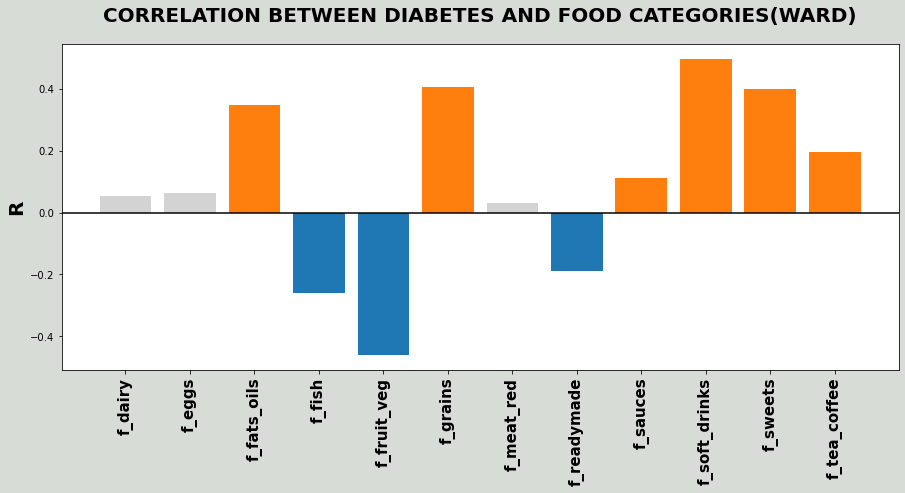

In [5]:
Corr_Youth = Compute_Correlation(joined_data,"gp_patients_diabetes",categories=food_categories)
fig = plt.figure(figsize=(15,6))
plt.title('CORRELATION BETWEEN DIABETES AND FOOD CATEGORIES(WARD)', fontsize=20,weight='bold',y=1.05)
plt.bar(Corr_Youth.input_list, Corr_Youth.R, color = ['lightgrey' if not v[3] else'tab:orange' if v[1] > 0 else 'tab:blue' for v in Corr_Youth.values])

names=data_food_categories.columns.str.split('_').str[1]
names=names[:-1]
plt.xticks(Corr_Youth.input_list,food_categories, rotation=90,fontsize=15,weight='bold')
plt.axhline(y=0,color='black')
plt.ylabel('R',fontsize=20,weight='bold')
fig.patch.set_facecolor('xkcd:light gray')
plt.show()
#Corr_Youth

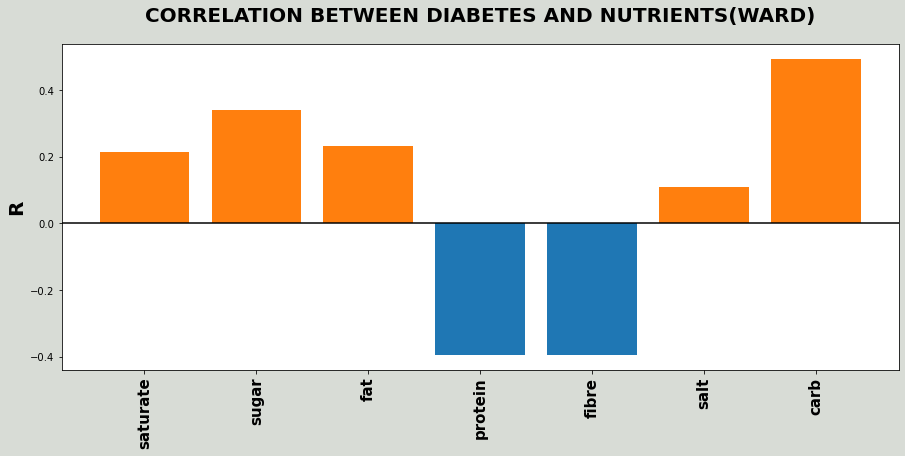

In [6]:
Corr_Youth = Compute_Correlation(joined_data,"gp_patients_diabetes",categories=nutrients)
fig = plt.figure(figsize=(15,6))
plt.title('CORRELATION BETWEEN DIABETES AND NUTRIENTS(WARD)', fontsize=20,weight='bold',y=1.05)
plt.bar(Corr_Youth.input_list, Corr_Youth.R, color = ['black' if not v[3] else'tab:orange' if v[1] > 0 else 'tab:blue' for v in Corr_Youth.values])
plt.xticks(Corr_Youth.input_list,nutrients, rotation=90,fontsize=15,weight='bold')
plt.axhline(y=0,color='black')
plt.ylabel('R',fontsize=20,weight='bold')
fig.patch.set_facecolor('xkcd:light gray')
plt.show()
#Corr_Youth

In [7]:
#reading all csv files in a folder
csv_files = glob.glob('C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\*csv')
csv_files

['C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Apr_borough_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Apr_lsoa_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Apr_msoa_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Apr_osward_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Aug_borough_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Aug_lsoa_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Aug_msoa_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Aug_osward_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\Dec_borough_grocery.csv',
 'C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level

In [8]:
merge_mean_data1=pd.DataFrame()
for f in csv_files:
    x=pd.read_csv(f)
    name=os.path.basename(f).replace("_grocery.csv","")
    c=np.mean(x['alcohol'])
    d=np.mean(x['f_beer'])
    e=np.mean(x['f_wine'])
    df2 = pd.DataFrame(np.array([[name,c,d,e]]),columns=['Month/Year', 'Average Alcohol','Average beer purchased in frac','Average wine purchased in frac'])
    merge_mean_data1=pd.concat([merge_mean_data1,df2],ignore_index=True)
merge_mean_data1[['Month', 'Areaname']] = merge_mean_data1["Month/Year"].apply(lambda x: pd.Series(str(x).split("_")))
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 ,'year':13}
merge_mean_data1.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x])).reset_index(drop=True)

,Month/Year,Average Alcohol,Average beer purchased in frac,Average wine purchased in frac,Month,Areaname
0,Jan_osward,0.1791735777276737,0.009962568530017042,0.013487162493808186,Jan,osward
1,Jan_msoa,0.17684555646442363,0.009785427601374696,0.01323408514640912,Jan,msoa
2,Jan_lsoa,0.1835745887324094,0.009948862372063586,0.013478598148797318,Jan,lsoa
3,Jan_borough,0.18654746015431214,0.010141666079848665,0.01420761911972056,Jan,borough
4,Feb_osward,0.19705675049864121,0.011042412202023571,0.015342093266510686,Feb,osward
5,Feb_msoa,0.19464944983729196,0.010857348488807955,0.015042332696840896,Feb,msoa
6,Feb_lsoa,0.2019348268932104,0.011036425446736227,0.015365381505273607,Feb,lsoa
7,Feb_borough,0.2054940319933194,0.011346091488960807,0.016143644837572392,Feb,borough
8,Mar_borough,0.2144064656115615,0.012023601052249384,0.015650984935111155,Mar,borough
9,Mar_osward,0.20833085545826152,0.01168240023569757,0.014900982335800644,Mar,osward


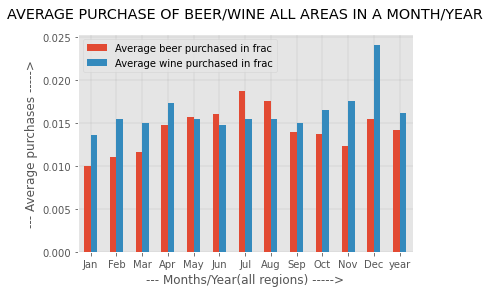

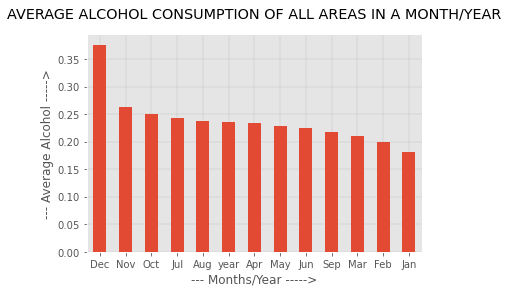

In [30]:
test=merge_mean_data1[['Average Alcohol','Average beer purchased in frac','Average wine purchased in frac','Month']]
test[['Average Alcohol','Average beer purchased in frac','Average wine purchased in frac']] = test[['Average Alcohol','Average beer purchased in frac','Average wine purchased in frac']].apply(pd.to_numeric, args=('coerce',))
test1=test[['Average beer purchased in frac','Average wine purchased in frac','Month']]
test1.groupby('Month').mean().sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x])).plot.bar(rot=0,xlabel='--- Months/Year(all regions) ----->',ylabel='--- Average purchases ----->')
plt.title('AVERAGE PURCHASE OF BEER/WINE ALL AREAS IN A MONTH/YEAR', y=1.05)
plt.grid(color='gray', linestyle='dashed',linewidth = 0.2)
plt.savefig("figure.png",dpi=1200,bbox_inches = 'tight')
plt.show()
test.groupby('Month')['Average Alcohol'].mean().sort_values(ascending=False).plot(xlabel='--- Months/Year ----->',ylabel='--- Average Alcohol ----->',kind='bar',rot=0)
plt.title('AVERAGE ALCOHOL CONSUMPTION OF ALL AREAS IN A MONTH/YEAR', y=1.05)
plt.grid(color='gray', linestyle='dashed',linewidth = 0.2)
fig.patch.set_facecolor('xkcd:gray')
plt.savefig("figure1.png",dpi=1200,bbox_inches = 'tight') 
plt.show()


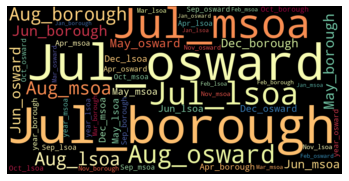

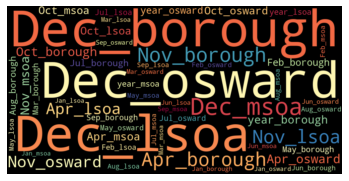

In [52]:
merge_mean_data1['Average beer purchased in frac']=merge_mean_data1['Average beer purchased in frac'].apply(pd.to_numeric)
merge_mean_data1['Average wine purchased in frac']=merge_mean_data1['Average wine purchased in frac'].apply(pd.to_numeric)

test=merge_mean_data1.nlargest(52,['Average beer purchased in frac'])
#test=test.drop('Average Alcohol',axis=1)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sort the DataFrame by the 'counts' column in descending order
sorted_df = test.sort_values(by='Average beer purchased in frac', ascending=False)

# Convert the sorted DataFrame to a dictionary
sorted_dict = dict(zip(sorted_df['Month/Year'], sorted_df['Average beer purchased in frac']))
sorted_dict1 = dict(zip(sorted_df['Month/Year'], sorted_df['Average wine purchased in frac']))


# Generate the word cloud from the sorted dictionary
wordcloud = WordCloud(width=1000, height=500,margin=2, background_color="black",min_font_size=10,colormap='Spectral',collocations=False).generate_from_frequencies(sorted_dict)
wordcloud1 = WordCloud(width=1000, height=500,margin=2, background_color="black",min_font_size=10,colormap='Spectral',collocations=False).generate_from_frequencies(sorted_dict1)

# Display the word cloud
plt.imshow(wordcloud,cmap='gray', interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.png')
wordcloud1.to_file('wordcloud1.png')

In [12]:
merge_data1=pd.DataFrame()
for f in csv_files:
    x=pd.read_csv(f)
    name=os.path.basename(f).replace("_grocery.csv","")
    c=x.shape[0]
    d=np.sum(x['population'])
    df2 = pd.DataFrame(np.array([[name, c,d]]),columns=['Month/Year', 'Number of areas','population'])
    merge_data1=pd.concat([merge_data1,df2],ignore_index=True)
merge_data1[['month', 'Areaname']] = merge_data1["Month/Year"].apply(lambda x: pd.Series(str(x).split("_")))
sorted_df1 = merge_data1.sort_values(by=['Number of areas','population'], ascending=[False,True])
c=sorted_df1['Month/Year'].str.contains('year')#,case=False,na=False)
x=sorted_df1[c].sort_values(by=['population'], ascending=[True])
x[['Areaname','Number of areas','population']]

,Areaname,Number of areas,population
49,lsoa,4833,8664108.0
50,msoa,983,8666930.0
51,osward,638,8666930.0
48,borough,33,8666930.0


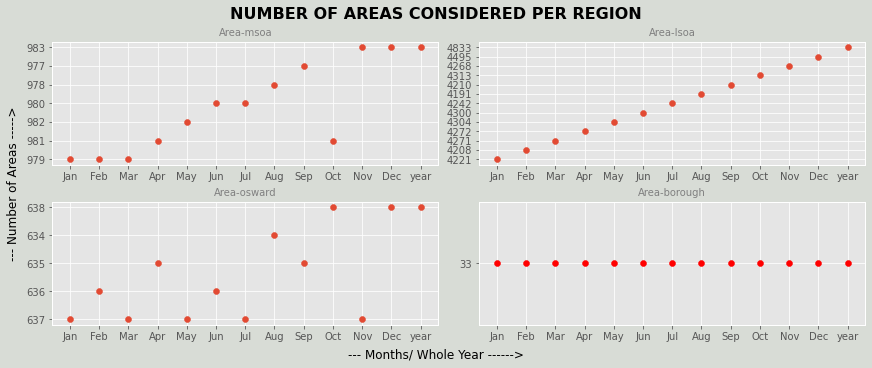

In [13]:
style.use('ggplot')
fig, axis = plt.subplots(2, 2,figsize=(12,5),constrained_layout = True)#,gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle("NUMBER OF AREAS CONSIDERED PER REGION", fontsize=16,color='black',weight='bold')
fig.supxlabel('--- Months/ Whole Year ------>')
fig.supylabel('--- Number of Areas ----->')
a=sorted_df1['Month/Year'].str.contains('msoa')#,case=False,na=False)
b=sorted_df1[a].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[0, 0].scatter(b['month'],b['Number of areas'])
axis[0, 0].set_title('Area-msoa',fontsize=10,color='grey')
c=sorted_df1['Month/Year'].str.contains('lsoa')#,case=False,na=False)
d=b=sorted_df1[c].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[0, 1].scatter(d['month'],d['Number of areas'])
axis[0, 1].set_title('Area-lsoa',fontsize=10,color='grey')
e=sorted_df1['Month/Year'].str.contains('osward')#,case=False,na=False)
f=sorted_df1[e].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[1, 0].scatter(f['month'],f['Number of areas'])
axis[1, 0].set_title('Area-osward',fontsize=10,color='grey')
g=sorted_df1['Month/Year'].str.contains('borough')#,case=False,na=False)
h=sorted_df1[g].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[1, 1].scatter(h['month'],h['Number of areas'],color='red')
axis[1, 1].set_title('Area-borough',fontsize=10,color='grey')
fig.patch.set_facecolor('xkcd:light gray')
plt.show()
# style.available

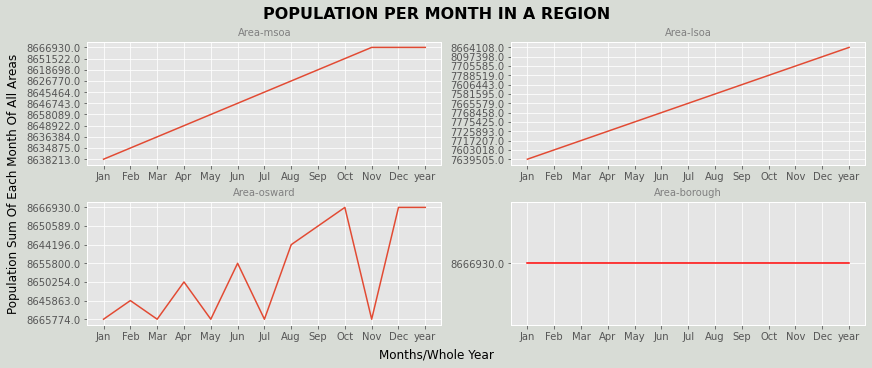

In [14]:
from matplotlib import style
style.use('ggplot')
fig, axis = plt.subplots(2, 2,figsize=(12,5),constrained_layout = True)#,gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle("POPULATION PER MONTH IN A REGION", fontsize=16,color='black',weight='bold')
fig.supxlabel('Months/Whole Year')
fig.supylabel('Population Sum Of Each Month Of All Areas')
a=sorted_df1['Month/Year'].str.contains('msoa')#,case=False,na=False)
b=sorted_df1[a].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[0, 0].plot(b['month'],b['population'])
axis[0, 0].set_title('Area-msoa',fontsize=10,color='grey')
c=sorted_df1['Month/Year'].str.contains('lsoa')#,case=False,na=False)
d=sorted_df1[c].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[0, 1].plot(d['month'],d['population'])
axis[0, 1].set_title('Area-lsoa',fontsize=10,color='grey')
e=sorted_df1['Month/Year'].str.contains('osward')#,case=False,na=False)
f=sorted_df1[e].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[1, 0].plot(f['month'],f['population'])
axis[1, 0].set_title('Area-osward',fontsize=10,color='grey')
g=sorted_df1['Month/Year'].str.contains('borough')#,case=False,na=False)
h=sorted_df1[g].sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
axis[1, 1].plot(h['month'],h['population'],color='red')
axis[1, 1].set_title('Area-borough',fontsize=10,color='grey')
fig.patch.set_facecolor('xkcd:light gray')
plt.show()

# <center>***TASK3***</center>

### 3.1 Plotting Income Trends of Borough

In [1]:
import pandas as pd
df=pd.read_excel("C:\\Users\\Sainad\\Desktop\\Applied coursework\\income_data.xlsx")
df=df.rename(columns=df.iloc[0].astype(str))
df=df.drop(df.index[0]).reset_index(drop=True)
a=df.iloc[:,3:]

In [35]:
b=df.sum(axis=1).sort_values(ascending=False)
b
#we can use the index to see which area has more income in all the years 

C:\Users\Sainad\AppData\Local\Temp\ipykernel_12320\3977093867.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b=df.sum(axis=1).sort_values(ascending=False)


0     3644283
19    1355246
32     916022
12     788067
26     756079
6      740742
31     675467
18     613719
23     590131
5      528076
13     519786
2      515702
20     502977
14     493183
8      485668
17     480862
29     473177
21     470450
27     462407
28     451340
10     448398
4      439985
15     425895
3      418527
7      417316
16     415718
30     415236
9      414113
25     411920
11     395296
22     393313
1      332004
24     309276
dtype: int64

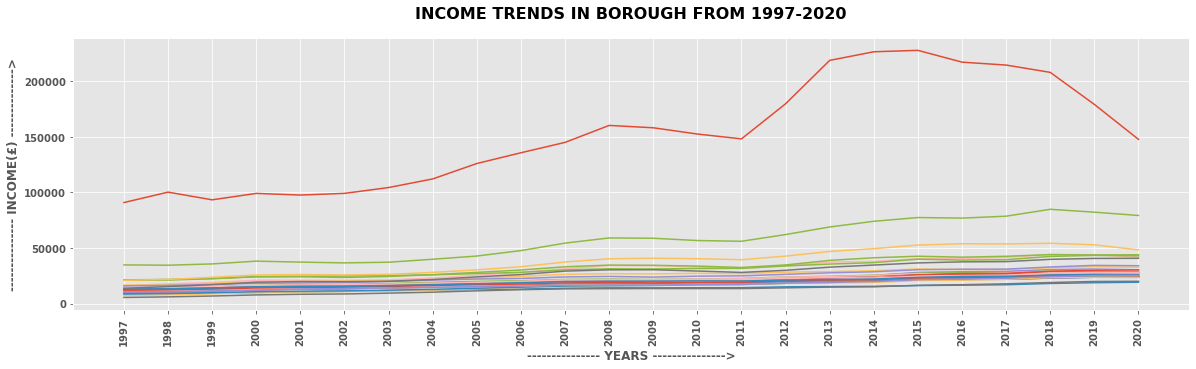

In [63]:
plt.figure(figsize=(20,5))
for i in range(len(a)):
    plt.plot(a.loc[i])
    plt.xticks(rotation=90,weight='bold')
    plt.yticks(fontsize=10,weight='bold')
plt.title('INCOME TRENDS IN BOROUGH FROM 1997-2020',y=1.05,fontsize=16,weight='bold')
plt.xlabel('--------------- YEARS --------------->',weight='bold')
plt.ylabel('--------------- INCOME(£) -------------->',weight='bold')
plt.savefig("figure3.png",dpi=1200,bbox_inches = 'tight')
plt.show()

### 3.2 Finding correlation between Income and groceries purchase

In [17]:
year_borough_grocery = pd.read_csv("C:\\Users\\Sainad\\Desktop\\Applied coursework\\Area-level grocery purchases\\year_borough_grocery.csv")
df2 = pd.read_excel("C:\\Users\\Sainad\\Desktop\\Applied coursework\\income_data.xlsx")
df2=df2.rename(columns=df2.iloc[0].astype(str))
income_data=df2.drop(df2.index[0]).reset_index(drop=True)

In [18]:
income_data.rename(columns = {'LAD code':'area_id'}, inplace = True)

In [19]:
joined_df = income_data.merge(year_borough_grocery, how='inner', on='area_id')
joined_df

,Region,area_id,Region name,1997,1998,1999,2000,2001,2002,2003,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,London,E09000001,City of London,90955,100333,93408,99183,97691,99214,104460,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,London,E09000002,Barking and Dagenham,8842,9089,9510,9999,10657,11049,11713,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,London,E09000003,Barnet,12615,13265,13976,15155,15672,16163,16923,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,London,E09000004,Bexley,11663,11776,12247,12888,13708,14012,14535,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,London,E09000005,Brent,10784,11226,12065,12904,13436,13966,14638,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098
5,London,E09000006,Bromley,13808,14431,15174,16289,16824,17136,18067,...,734232,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447
6,London,E09000007,Camden,16075,17822,19004,21065,20960,20976,21301,...,917661,243837.0,121808.0,122029.0,46242.0,169330.0,28265.0,35.934276,21.87,11149.382716
7,London,E09000008,Croydon,10174,10553,11344,12346,12946,13386,14142,...,824237,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972
8,London,E09000009,Ealing,12886,13217,13953,14767,15324,15695,16421,...,1824981,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775
9,London,E09000010,Enfield,10853,11228,11604,12564,13313,13446,13996,...,3493012,328738.0,159756.0,168982.0,83274.0,203384.0,42080.0,36.190751,80.84,4066.526472


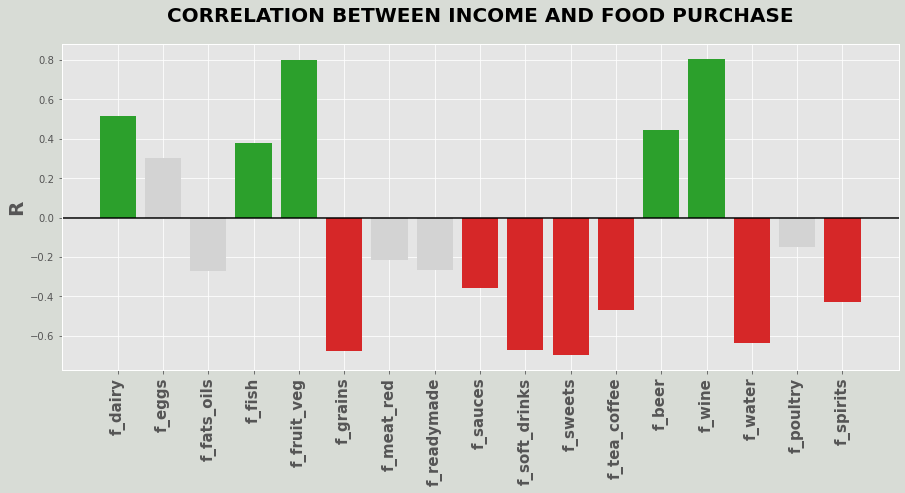

In [20]:
food_categories=['f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_sweets', 'f_tea_coffee','f_beer','f_wine','f_water','f_poultry','f_spirits']
Corr_Youth = Compute_Correlation(joined_df,"2015",categories=food_categories)
fig = plt.figure(figsize=(15,6))
plt.title('CORRELATION BETWEEN INCOME AND FOOD PURCHASE', fontsize=20,weight='bold',y=1.05)
plt.bar(Corr_Youth.input_list, Corr_Youth.R, color = ['lightgrey' if not v[3] else'tab:green' if v[1] > 0 else 'tab:red' for v in Corr_Youth.values])
names=data_food_categories.columns.str.split('_').str[1]
names=names[:-1]
plt.xticks(Corr_Youth.input_list,food_categories, rotation=90,fontsize=15,weight='bold')
plt.axhline(y=0,color='black')
plt.ylabel('R',fontsize=20,weight='bold')
fig.patch.set_facecolor('xkcd:light gray')
#plt.savefig("figure3.png",dpi=1200)
plt.show()